<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions-and-Classes" data-toc-modified-id="Functions-and-Classes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions and Classes</a></span><ul class="toc-item"><li><span><a href="#Return-Object" data-toc-modified-id="Return-Object-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Return Object</a></span></li><li><span><a href="#Function:-Create-Fixation-Distributions" data-toc-modified-id="Function:-Create-Fixation-Distributions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Function: Create Fixation Distributions</a></span></li><li><span><a href="#Function:-Random-Walk" data-toc-modified-id="Function:-Random-Walk-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Function: Random Walk</a></span></li><li><span><a href="#Function:-Plot" data-toc-modified-id="Function:-Plot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Function: Plot</a></span></li></ul></li><li><span><a href="#Test" data-toc-modified-id="Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test</a></span></li></ul></div>

**IMPORT LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**IMPORT STUDY DATA**

In [4]:
# Trial Data
expdata = "data/made_v2/expdata.csv"

# Fixation Data
fixations = "data/made_v2/fixations.csv"

# Functions and Classes

## Return Object

In [5]:
class ReturnValue(object):
    def __init__(self, latencies, responses, evidence, num_sims):
        self.latencies = latencies
        self.responses = responses
        self.evidence = evidence
        self.num_sims = num_sims

## Function: Create Fixation Distributions

In [6]:
df = pd.DataFrame.from_csv(fixations, header=0, sep=",", index_col=None)

/Users/djw/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  if __name__ == '__main__':


In [7]:
# first create distributions of first/mid fixations
first_fix_dist = df['fix_time'][df['fix_num']==1]
mid_fix_dist = df['fix_time'][(df['fix_num']>1) & (df['rev_fix_num']>1)]

In [12]:
min_time = 0
num_sims = 1000

In [13]:
while min_time < 10000:   # 10,000 = maxRT
    # create column of first fixations
    dwell_array = np.reshape(((np.random.choice(first_fix_dist, num_sims, replace=True))), (num_sims,1))

    # create additional columns from middle fixation distribution
    for column in range(20):
        append_mid_fix_array = np.reshape(((np.random.choice(mid_fix_dist, num_sims, replace=True))), (num_sims,1))
        dwell_array = np.append(dwell_array, append_mid_fix_array, axis=1)

    # make each column the sum of itself and the previous column
    for column in range(1, np.shape(dwell_array)[1]):
        dwell_array[:,column] = dwell_array[:,column] + dwell_array[:,(column-1)] 

    min_time = min(dwell_array[:,20])

In [29]:
dwell_array[0,2]

1784.3327257141927

In [17]:
start0_array[:,i] = [variance * np.random.randn(dwell_array[:,i]) + drift for x in S if drift_index % 2 == 0
    
value = 123
print(value, 'is', 'even' if value % 2 == 0 else 'odd')]

1000

In [22]:
time_samples = 10000

In [26]:
n = np.zeros((num_sims, time_samples))

In [27]:
print("%d bytes" % (n.size * n.itemsize))

80000000 bytes


## Function: Random Walk

In [13]:
def random_walk_model(num_sims, num_samples, drift, noise, criterion, start_var=0, drift_var=0, start_bias=0):
    
    latencies = np.zeros(num_sims, dtype=int)
    responses = np.zeros(num_sims)
    evidence = np.zeros((num_sims, num_samples+1))
    
    for i in range(num_sims):
        # set starting point
        evidence[i,0] = start_var * np.random.randn(1) + start_bias
        
        # add variability to drift
        sim_drift = drift_var * np.random.randn(1) + drift
        
        # add noise to get momentary values
        evidence[i,1:] = noise * (np.sqrt(precision)) * np.random.randn(num_samples) + sim_drift * precision
        
        # accumulation of evidence (based on summation of momentary values)
        evidence[i,:] = np.cumsum(evidence[i,:])
        
        # check where the sim crossed the criterion (boundary)
        p = (np.abs(evidence[i,:]) > criterion).argmax()
        responses[i] = np.sign(evidence[i,p])
        latencies[i] = p
    
    return ReturnValue(latencies, responses, evidence, num_sims)

## Function: Plot

In [14]:
def plot_hists(model):
    # Set size of figure
    plt.figure(figsize=(12,12))   

    plt.subplot(2,1,1)
    top_rt = model.latencies[model.responses>0]
    top_prop = len(top_rt)/float(model.num_sims)
    plt.hist(top_rt, bins=20)

    # Labeling etc.
    plt.xlabel('Decision Time', fontsize = 16)
    plt.ylabel('Frequency', fontsize = 16)
    plt.title('Top Responses (' + str(top_prop) + ') m='+ str(np.round(np.mean(top_rt),decimals=2)), fontsize = 18)

    plt.subplot(2,1,2)
    bottom_rt = model.latencies[model.responses<0]
    bottom_prop = len(bottom_rt)/float(model.num_sims)
    plt.hist(bottom_rt, bins=20)

    # Labeling etc.
    plt.xlabel('Decision Time', fontsize = 16)
    plt.ylabel('Frequency', fontsize = 16)
    plt.title('Bottom Responses (' + str(bottom_prop) + ') m='+ str(np.round(np.mean(bottom_rt),decimals=2)), fontsize = 18)

    plt.show()

# Test

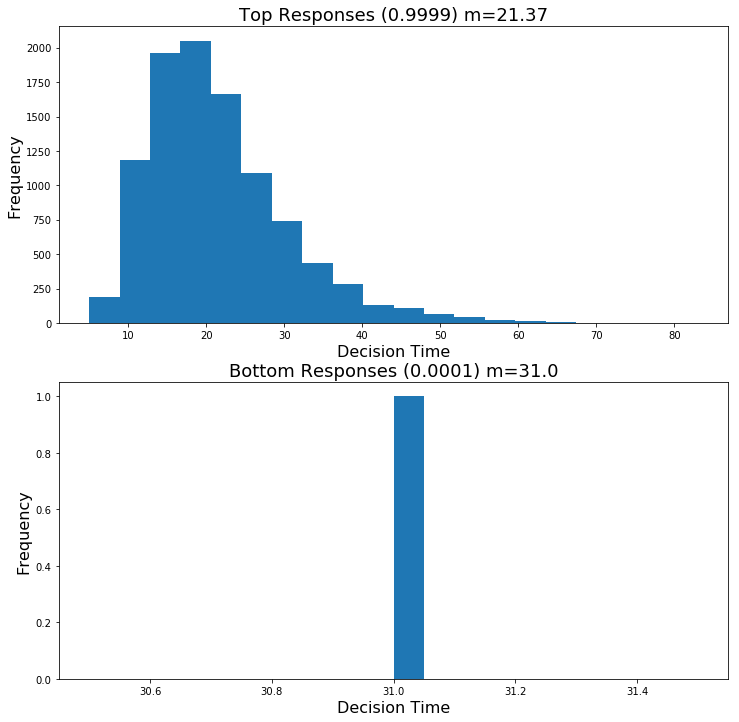

In [19]:
model = random_walk_model(num_sims=10000,
                          num_samples=2000,
                          drift= 0.05,
                          noise=0.1,
                          criterion=1,
                          start_var=0.0,
                          drift_var=0.0,
                          start_bias=0.)

plot_hists(model)